# Sentiment Analysis: Example-1
# (VADER: Valence Aware Dictionary and sEntement Reasoner)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Data: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?resource=download

# Read the data
review_df = pd.read_csv("/home/pranjal/Downloads/nlp amity/archive (2)/tripadvisor_hotel_reviews.csv")
review_df['ID'] = range(1, len(review_df)+1)

# What is in the data-file (shape and information in the columns)?
print(review_df.shape)
review_df.head()

(20491, 3)


,Review,Rating,ID
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,2
2,nice rooms not 4* experience hotel monaco seat...,3,3
3,"unique, great stay, wonderful time hotel monac...",5,4
4,"great stay great stay, went seahawk game aweso...",5,5


# Exploratory Data Analysis

In [3]:
# What type of detailed comments do we have here? (column = "text")
review_df['Review'].values[3]

"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly room showed no signs animal hair smells, monaco suite sleeping area big striped curtains pulled closed nice touch felt cosy, goldfish named brandi enjoyed, did n't partake free wine coffee/tea service lobby thought great feature, great staff friendly, free wireless internet hotel worked suite 2 laptops, decor lovely eclectic mix pattens color palatte, animal print bathrobes feel like rock stars, nice did n't look like sterile chain hotel hotel personality excellent stay,  "

In [4]:
# What type of Ratings we have? (column = "Score")
review_df["Rating"]

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64

Text(0, 0.5, 'Counts')

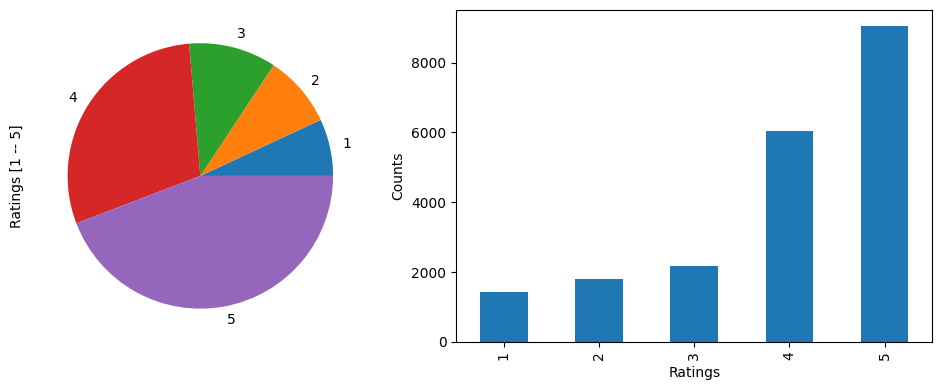

In [5]:
# Visualize what type of Ratings we have? (column = "Score")

fig1, ax = plt.subplots(1, 2, figsize=(10, 4), tight_layout = True) # --> (rows=1, columns=2)

# Plot command option
# review_df["Score"].value_counts().sort_index().plot(kind = "pie", figsize = (8,4))
# review_df["Score"].value_counts().sort_index().plot(kind = "bar", figsize = (8,4))
plt.subplot(1,2,1)
review_df["Rating"].value_counts().sort_index().plot.pie()
ax[0].set_ylabel("Ratings [1 -- 5]")

plt.subplot(1,2,2)
review_df["Rating"].value_counts().sort_index().plot.bar()
ax[1].set_xlabel("Ratings")
ax[1].set_ylabel("Counts")

# Use of Natural Language Processing Tool-Kit (NLTK)

In [6]:
import nltk

In [7]:
# Implementing NLTK on the text data:

some_random_review = review_df['Review'].values[100]
print(some_random_review)

great location staff location price make older hotel good choice, staff friendly, looking modern place not, old studio apartment building run hotel, great neighborhood close great local resturants, hotel does not sterile tourist feeling newer mid range hotels, feels like small european hotel, yes rooms use little moderizing compermise, just reservations stay,  


## (1) Word Tokenizer (Tokens from words)

In [8]:
import nltk

# Download the 'punkt' tokenizer data to the default NLTK data directory
nltk.download('punkt')

# Your code for tokenization
tokens = nltk.word_tokenize(some_random_review) # Defined in the previous frame
display(tokens)


[nltk_data] Downloading package punkt to /home/pranjal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['great',
 'location',
 'staff',
 'location',
 'price',
 'make',
 'older',
 'hotel',
 'good',
 'choice',
 ',',
 'staff',
 'friendly',
 ',',
 'looking',
 'modern',
 'place',
 'not',
 ',',
 'old',
 'studio',
 'apartment',
 'building',
 'run',
 'hotel',
 ',',
 'great',
 'neighborhood',
 'close',
 'great',
 'local',
 'resturants',
 ',',
 'hotel',
 'does',
 'not',
 'sterile',
 'tourist',
 'feeling',
 'newer',
 'mid',
 'range',
 'hotels',
 ',',
 'feels',
 'like',
 'small',
 'european',
 'hotel',
 ',',
 'yes',
 'rooms',
 'use',
 'little',
 'moderizing',
 'compermise',
 ',',
 'just',
 'reservations',
 'stay',
 ',']

## (1) Part of Speech (POS) tagging for these words (tokens)

In [9]:
"""
POS Tags by 'averaged_perceptron_tagger' in NLTK
It contains Pre-trained English [Part-of-Speech (POS]] tagger.

01. CC   = Coordinating conjunction    02. CD   = Cardinal number
03. DT   = Determiner                  04. EX   = Existential there
05. FW   = Foreign word                06. IN   = Preposition or subordinating conjunction
07. JJ   = Adjective                   08. JJR  = Adjective, comparative
09. JJS  = Adjective, superlative      10. LS   = List item marker
11. MD   = Modal                       12. NN   = Noun, singular or mass
13. NNS  = Noun, plural                14. NNP  = Proper noun, singular
15. NNPS = Proper noun, plural         16. PDT  = Predeterminer
17. POS  = Possessive ending           18. PRP  = Personal pronoun
19. PRP$ = Possessive pronoun          20. RB   = Adverb
21. RBR  = Adverb, comparative         22. RBS  = Adverb, superlative
23. RP   = Particle                    24. SYM  = Symbol
25. TO   = to                          26. UH   = Interjection
27. VB   = Verb, base form             28. VBZ  = Verb, 3rd person singular present
29. VBN  = Verb, past participle       30. VBG  = Verb, gerund or present participle     
31. VBD  = Verb, past tense            32. VBP  = Verb, non-3rd person singular present  
33. WDT  = Wh-determiner               34. WP   = Wh-pronoun
35. WP$  = Possessive wh-pronoun       36. WRB  = Wh-adverb
"""

import nltk

# Download the 'averaged_perceptron_tagger' data to the default NLTK data directory
nltk.download('averaged_perceptron_tagger')

# Your code for tokenization (assuming 'tokens' is defined earlier)
tokens = nltk.word_tokenize(some_random_review)

# Perform POS tagging on the tokens
tagged_words = nltk.pos_tag(tokens)  # It's a tuple with word and tag!
tagged_words


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/pranjal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('great', 'JJ'),
 ('location', 'NN'),
 ('staff', 'NN'),
 ('location', 'NN'),
 ('price', 'NN'),
 ('make', 'VBP'),
 ('older', 'JJR'),
 ('hotel', 'NN'),
 ('good', 'JJ'),
 ('choice', 'NN'),
 (',', ','),
 ('staff', 'NN'),
 ('friendly', 'RB'),
 (',', ','),
 ('looking', 'VBG'),
 ('modern', 'JJ'),
 ('place', 'NN'),
 ('not', 'RB'),
 (',', ','),
 ('old', 'JJ'),
 ('studio', 'NN'),
 ('apartment', 'NN'),
 ('building', 'VBG'),
 ('run', 'JJ'),
 ('hotel', 'NN'),
 (',', ','),
 ('great', 'JJ'),
 ('neighborhood', 'NN'),
 ('close', 'RB'),
 ('great', 'JJ'),
 ('local', 'JJ'),
 ('resturants', 'NNS'),
 (',', ','),
 ('hotel', 'NN'),
 ('does', 'VBZ'),
 ('not', 'RB'),
 ('sterile', 'JJ'),
 ('tourist', 'NN'),
 ('feeling', 'VBG'),
 ('newer', 'JJR'),
 ('mid', 'NN'),
 ('range', 'NN'),
 ('hotels', 'NNS'),
 (',', ','),
 ('feels', 'NNS'),
 ('like', 'IN'),
 ('small', 'JJ'),
 ('european', 'JJ'),
 ('hotel', 'NN'),
 (',', ','),
 ('yes', 'UH'),
 ('rooms', 'NNS'),
 ('use', 'VBP'),
 ('little', 'JJ'),
 ('moderizing', 'JJ'),
 (

## Gouping the tags together (taking chunks of tags)

In [10]:
"""
nltk.chunk.ne_chunk(tagged_tokens, binary=False)
Use NLTK's currently recommended named entity chunker to
chunk the given list of tagged tokens.

"""

import nltk

# Download the 'maxent_ne_chunker' and 'words' data to the default NLTK data directory
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Your code for tokenization and POS tagging (assuming 'tagged_words' is already defined)
tokens = nltk.word_tokenize(some_random_review)
tagged_words = nltk.pos_tag(tokens)  # It's a tuple with word and tag!

# Chunk and print the chunked tags
chunked_tags = nltk.chunk.ne_chunk(tagged_words)
chunked_tags.pprint()

# If you want to save the chunked tags
# chunked_tw = nltk.chunk.ne_chunk(tagged_words)
# print(chunked_tw)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/pranjal/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/pranjal/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  great/JJ
  location/NN
  staff/NN
  location/NN
  price/NN
  make/VBP
  older/JJR
  hotel/NN
  good/JJ
  choice/NN
  ,/,
  staff/NN
  friendly/RB
  ,/,
  looking/VBG
  modern/JJ
  place/NN
  not/RB
  ,/,
  old/JJ
  studio/NN
  apartment/NN
  building/VBG
  run/JJ
  hotel/NN
  ,/,
  great/JJ
  neighborhood/NN
  close/RB
  great/JJ
  local/JJ
  resturants/NNS
  ,/,
  hotel/NN
  does/VBZ
  not/RB
  sterile/JJ
  tourist/NN
  feeling/VBG
  newer/JJR
  mid/NN
  range/NN
  hotels/NNS
  ,/,
  feels/NNS
  like/IN
  small/JJ
  european/JJ
  hotel/NN
  ,/,
  yes/UH
  rooms/NNS
  use/VBP
  little/JJ
  moderizing/JJ
  compermise/NN
  ,/,
  just/RB
  reservations/NNS
  stay/VBP
  ,/,)


# Sentiment Analysis using VADER:
## (Valence Aware Dictionary and sEntement Reasoner)


# What we are doing? 
## Use Sentiment Intensity Analyzer to get positive (pos) / negative (neg) / neutral (neu) scores of the text.

## What is VADER? 
## A Parsimonious Rule-based Model for Sentiment Analysis (specially Social Media Text)
## It uses a "bag of words" (BoW) approach:

### A BoW is a representation of text according to the occurrence of words within a document. 
#### BoW do not consider the structure of the sentence (relationships between words).
#### It has a 'vocabulary' of known words, and a measure of the presence of known words. 
    # (1) Designing and managing the Vocabulary, 
        ## Remove case, punctuation (Stop words), frequent words with not much information (of, a)
        ## Fixing misspelled words
        ## Reducing words to their stem (e.g. “process” from “processing”) using stemming algorithms. 
    # (2) Create Document Vectors
    # (3) Find a "total score" for the sentence by combining score for each word in the sentence

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the 'vader_lexicon' data to the default NLTK data directory
nltk.download('vader_lexicon')

# Define the SentimentIntensityAnalyzer object
si_analizer = SentimentIntensityAnalyzer()

# Now you can use the si_analyzer to analyze sentiment
si_analizer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/pranjal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
# Try it out (si_analizer object defined above) to find scores of some example sentence:
s1 = 'You do not look happy.'
s2 = 'You look happy.'
s3 = "He seemed Okay, I think!"
s4 = "I am on my way to the class."

si_analizer.polarity_scores(s1) # --> will give you dictionary for +ve, -ve, 0s, scores

print(si_analizer.polarity_scores(s1))
print(si_analizer.polarity_scores(s2))
print(si_analizer.polarity_scores(s3))
print(si_analizer.polarity_scores(s4))

{'neg': 0.428, 'neu': 0.572, 'pos': 0.0, 'compound': -0.4585}
{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.2942}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Apply this for our detailed review "text"

In [13]:
# To track the progress: 
from tqdm.notebook import tqdm

In [14]:
review_df.head(5)

,Review,Rating,ID
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,2
2,nice rooms not 4* experience hotel monaco seat...,3,3
3,"unique, great stay, wonderful time hotel monac...",5,4
4,"great stay great stay, went seahawk game aweso...",5,5


In [16]:
review_scores = []

# Loop through each review in the DataFrame
for review_text in tqdm(review_df['Review'], total=len(review_df)):
    review_score = si_analizer.polarity_scores(review_text)
    review_scores.append(review_score)

# Display the list of sentiment scores
for idx, score in enumerate(review_scores):
    print(f"Review {idx + 1} Score: {score}")

  0%|          | 0/20491 [00:00<?, ?it/s]

Review 1 Score: {'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747}
Review 2 Score: {'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'compound': 0.9787}
Review 3 Score: {'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'compound': 0.9889}
Review 4 Score: {'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'compound': 0.9912}
Review 5 Score: {'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'compound': 0.9797}
Review 6 Score: {'neg': 0.084, 'neu': 0.651, 'pos': 0.265, 'compound': 0.987}
Review 7 Score: {'neg': 0.026, 'neu': 0.609, 'pos': 0.364, 'compound': 0.9925}
Review 8 Score: {'neg': 0.032, 'neu': 0.74, 'pos': 0.228, 'compound': 0.959}
Review 9 Score: {'neg': 0.038, 'neu': 0.663, 'pos': 0.298, 'compound': 0.9618}
Review 10 Score: {'neg': 0.064, 'neu': 0.451, 'pos': 0.484, 'compound': 0.9756}
Review 11 Score: {'neg': 0.08, 'neu': 0.524, 'pos': 0.395, 'compound': 0.9666}
Review 12 Score: {'neg': 0.076, 'neu': 0.629, 'pos': 0.296, 'compound': 0.9242}
Review 13 Score: {'neg': 0.075, 'neu': 0.551, 'pos': 0.37

Review 12466 Score: {'neg': 0.271, 'neu': 0.516, 'pos': 0.213, 'compound': -0.6705}
Review 12467 Score: {'neg': 0.149, 'neu': 0.718, 'pos': 0.134, 'compound': 0.1485}
Review 12468 Score: {'neg': 0.208, 'neu': 0.628, 'pos': 0.164, 'compound': -0.6908}
Review 12469 Score: {'neg': 0.122, 'neu': 0.685, 'pos': 0.193, 'compound': 0.6348}
Review 12470 Score: {'neg': 0.162, 'neu': 0.575, 'pos': 0.264, 'compound': 0.9581}
Review 12471 Score: {'neg': 0.12, 'neu': 0.621, 'pos': 0.258, 'compound': 0.9969}
Review 12472 Score: {'neg': 0.167, 'neu': 0.692, 'pos': 0.142, 'compound': -0.7207}
Review 12473 Score: {'neg': 0.088, 'neu': 0.664, 'pos': 0.248, 'compound': 0.9943}
Review 12474 Score: {'neg': 0.198, 'neu': 0.581, 'pos': 0.221, 'compound': 0.8188}
Review 12475 Score: {'neg': 0.09, 'neu': 0.519, 'pos': 0.391, 'compound': 0.9969}
Review 12476 Score: {'neg': 0.152, 'neu': 0.735, 'pos': 0.113, 'compound': -0.8709}
Review 12477 Score: {'neg': 0.313, 'neu': 0.531, 'pos': 0.156, 'compound': -0.9727}
R

# Visualization of the results: 

## Lets Put the results in a data frame:

In [17]:
result_df = pd.DataFrame(review_scores)


In [18]:
result_df.head(10)

,neg,neu,pos,compound
0,0.072,0.643,0.285,0.9747
1,0.110,0.701,0.189,0.9787
2,0.081,0.700,0.219,0.9889
3,0.060,0.555,0.385,0.9912
4,0.135,0.643,0.221,0.9797
5,0.084,0.651,0.265,0.9870
6,0.026,0.609,0.364,0.9925
7,0.032,0.740,0.228,0.9590
8,0.038,0.663,0.298,0.9618
9,0.064,0.451,0.484,0.9756


In [24]:
# Visualize Results:
sample_result_df = result_df.head(1000)
sample_result_df


#result_df.info()
#result_df.index

,neg,neu,pos,compound
0,0.072,0.643,0.285,0.9747
1,0.110,0.701,0.189,0.9787
2,0.081,0.700,0.219,0.9889
3,0.060,0.555,0.385,0.9912
4,0.135,0.643,0.221,0.9797
...,...,...,...,...
995,0.078,0.615,0.307,0.6808
996,0.040,0.683,0.277,0.9442
997,0.164,0.613,0.223,0.6964
998,0.059,0.628,0.313,0.9628


In [20]:
result_df.compound.describe()

count    20491.000000
mean         0.803430
std          0.455671
min         -0.997400
25%          0.918400
50%          0.973800
75%          0.988800
max          0.999900
Name: compound, dtype: float64

In [21]:
result_df.neg.describe()

count    20491.000000
mean         0.071908
std          0.065673
min          0.000000
25%          0.025000
50%          0.059000
75%          0.103000
max          0.646000
Name: neg, dtype: float64

# Add these results with the original data-frame for comparison and analysis:

In [25]:
sample_review_df = review_df.head(1000)

sample_result_df = sample_result_df.reset_index().rename(columns={'index': 'ID'})
sample_result_df

,ID,neg,neu,pos,compound
0,0,0.072,0.643,0.285,0.9747
1,1,0.110,0.701,0.189,0.9787
2,2,0.081,0.700,0.219,0.9889
3,3,0.060,0.555,0.385,0.9912
4,4,0.135,0.643,0.221,0.9797
...,...,...,...,...,...
995,995,0.078,0.615,0.307,0.6808
996,996,0.040,0.683,0.277,0.9442
997,997,0.164,0.613,0.223,0.6964
998,998,0.059,0.628,0.313,0.9628


In [27]:
sample_final_df = sample_result_df.merge(review_df, how='left')

sample_final_df
sample_final_df.dropna()

,ID,neg,neu,pos,compound,Review,Rating
1,1,0.110,0.701,0.189,0.9787,nice hotel expensive parking got good deal sta...,4.0
2,2,0.081,0.700,0.219,0.9889,ok nothing special charge diamond member hilto...,2.0
3,3,0.060,0.555,0.385,0.9912,nice rooms not 4* experience hotel monaco seat...,3.0
4,4,0.135,0.643,0.221,0.9797,"unique, great stay, wonderful time hotel monac...",5.0
5,5,0.084,0.651,0.265,0.9870,"great stay great stay, went seahawk game aweso...",5.0
...,...,...,...,...,...,...,...
995,995,0.078,0.615,0.307,0.6808,just returned clift wife just returned wonderf...,5.0
996,996,0.040,0.683,0.277,0.9442,average price hotel good location 1.5 blocks u...,3.0
997,997,0.164,0.613,0.223,0.6964,good customer service recently wrote dissatisf...,4.0
998,998,0.059,0.628,0.313,0.9628,ignore bad press just post review reading nega...,4.0


Text(0.5, 1.0, 'Sentiment-Intensity-Scores of the reviews (Compound-score)')

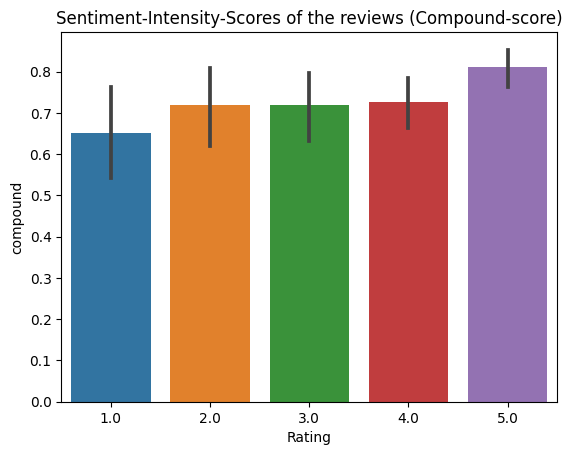

In [29]:
ax = sns.barplot(data=sample_final_df, x = "Rating", y='compound')
ax.set_title('Sentiment-Intensity-Scores of the reviews (Compound-score)')


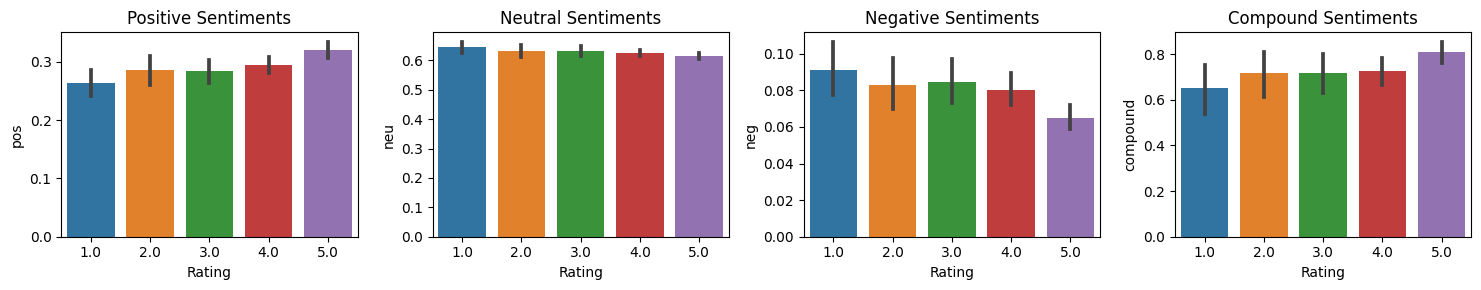

In [30]:
# Lets see more!

fig, axs = plt.subplots(1, 4, figsize=(15, 3))

sns.barplot(data=sample_final_df, x = sample_final_df.Rating, y='pos', ax=axs[0])
sns.barplot(data=sample_final_df, x = sample_final_df.Rating, y='neu', ax=axs[1])
sns.barplot(data=sample_final_df, x = sample_final_df.Rating, y='neg', ax=axs[2])
sns.barplot(data=sample_final_df, x = sample_final_df.Rating, y='compound', ax=axs[3])

axs[0].set_title('Positive Sentiments')
axs[1].set_title('Neutral Sentiments')
axs[2].set_title('Negative Sentiments')
axs[3].set_title('Compound Sentiments')

plt.tight_layout()


# Meaning? --> 
   ## 5 star ratings --> Higher compound-sentiment-intensity
   ## 1 star ratings --> Lower compound-sentiment-intensity
   ## Result: From lower ratings to higher compound-sentiment-intensity increases